In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt

In [373]:
from sklearn.datasets import make_moons

In [374]:
x, y = make_moons(n_samples=500,  shuffle=True,  noise=0.2, random_state=3)

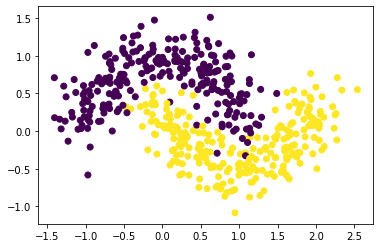

In [375]:
plt.scatter(x[:, 0], x[:, 1], c=y);

In [376]:
class NeuralNetowork:
    
    def __init__(self, input_size, hidden_layer, output_size):
        np.random.seed(0)
        
        # total layers including input layer(which is not a layer by the way) 
        layers = [input_size] + hidden_layer + [output_size]
        # params
        params = {}
        
        for i in range(len(layers) - 1):
            params['W'+str(i+1)] = np.random.randn(layers[i], layers[i + 1])*0.01
            params['b'+str(i+1)] = np.zeros((1, layers[i + 1]))
            
        self.params = params
        self.layers = layers
        self.losses = []
        
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def softmax(self, a):
        ea = np.exp(a)
        s = np.sum(ea, axis = 1, keepdims=True)
        return ea/s
    
    def forward_propagation(self, x):
        
        activations  = []
        activations.append(x)
        
        for layer in range(1, len(self.layers)): # starts from 1 because 1st layer is pseudo layer
            
            z = np.dot(activations[-1], self.params['W'+str(layer)]) + self.params['b'+str(layer)]
            
            # we use softmax as last layer activation function
            if layer == len(self.layers) - 1:
                a = self.softmax(z)
            else:
                a = self.relu(z)
                
            activations.append(a)
        
        self.activations = activations
        y_ = activations[-1]
        return y_
    
    def update_parameter(self, grads_dw, grads_db,learning_rate = 0.01):
        
        # gradients are in reverse order (grads[0] is gradient for output layer)
        m = len(grads_dw) # or grads_b both have same length
        for i in range(m):
            self.params['W' + str(m - i)] -= learning_rate*grads_dw[i]
            self.params['b' + str(m - i)] -= learning_rate*grads_db[i]
        
    
    def compute_loss(self, y_oht,p):
        l = -np.mean(y_oht*np.log(p))
        return l
    
    def backward_propagation(self, x, y):
        activations = self.activations
        y_ = activations[-1]
        
        m = x.shape[0]
        
        grads_dw = []
        grads_db = []
        
        # for first hidden layer (from last)
        delta = y_ - y #assuming that y is one hot encoded
        dw = np.dot(activations[-2].T, delta)
        db = (1/m)*np.sum(delta, axis=0)
        grads_dw.append(dw)
        grads_db.append(db)
        
        
        for i in range(len(self.params)//2, 0, -1):
            delta = np.dot(delta, self.params['W'+str(i)].T)
            dw = np.dot(activations[i - 1].T, delta)
            db = (1/m)*np.sum(delta, axis=0)
            grads_dw.append(dw)
            grads_db.append(db)
            
        return grads_dw, grads_db
        
        
    def predict(self,x):
        y_out = self.forward_propagation(x)
        return np.argmax(y_out,axis=1)

In [381]:
model.params

{'W1': array([[ 0.01764052,  0.00400157,  0.00978738,  0.02240893],
        [ 0.01867558, -0.00977278,  0.00950088, -0.00151357]]),
 'b1': array([[0., 0., 0., 0.]]),
 'W2': array([[-0.00103219,  0.00410599,  0.00144044],
        [ 0.01454274,  0.00761038,  0.00121675],
        [ 0.00443863,  0.00333674,  0.01494079],
        [-0.00205158,  0.00313068, -0.00854096]]),
 'b2': array([[0., 0., 0.]]),
 'W3': array([[-0.0255299 ,  0.00653619],
        [ 0.00864436, -0.00742165],
        [ 0.02269755, -0.01454366]]),
 'b3': array([[0., 0.]])}

In [377]:
model = NeuralNetowork(2, [4, 3], 2)

In [378]:
model.forward_propagation(x)
model.backward_propagation(x, pd.get_dummies(y).values)

ValueError: shapes (500,2) and (3,4) not aligned: 2 (dim 1) != 3 (dim 0)